Problem Statement: Predicting marks a student can score based on no. of  hours of study


Approach: We're going to use Supervised Learning technique to train various predictive models in the process in order to get most optimised output!

*It's always best to decide/plan the further process after having an overview of the provided Dataset. Let's do the same :)*

# **Importing Relevant Libraries**

In [212]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# **Loading Provided Dataset**

In [213]:
path="http://bit.ly/w-data"
data=pd.read_csv(path)

# **Overview of Dataset**

In [214]:
data.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


# **Checking information like shape, data-types of elements and memory usage by the provided dataset**

In [215]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


# **Checking for Null/NaN entries**

In [216]:
data.isnull().sum()

Hours     0
Scores    0
dtype: int64

# **Checking the range of values across various parameters in the given dataset.**

In [217]:
data.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


# **Visualizing Distribution of variables in the Dataset:**

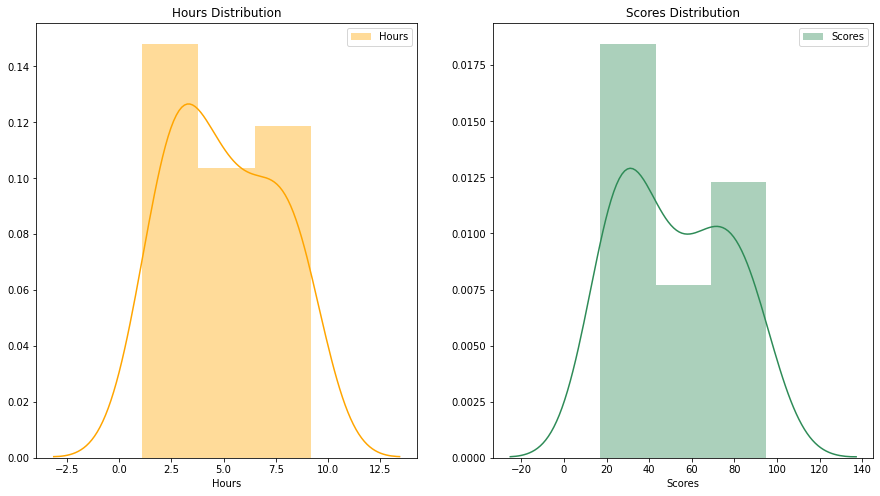

In [218]:
graph=plt.figure(figsize=(15,8))
g1=graph.add_subplot(121)
g2=graph.add_subplot(122)
g1.set_title('Hours Distribution')
g2.set_title('Scores Distribution')
p1=sns.distplot(data['Hours'],label='Hours',ax=g1,color='orange')
p2=sns.distplot(data['Scores'],label='Scores',ax=g2,color='seagreen')
p1.legend()
p2.legend()

# **Visualizing Relationship between the variables:**





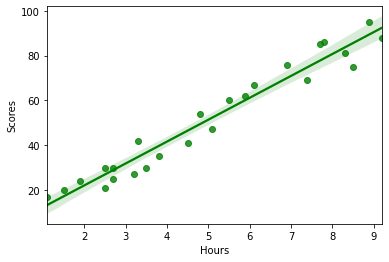

In [219]:
sns.regplot(x=data['Hours'],y=data['Scores'],color='g')

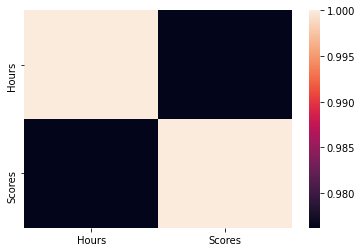

In [220]:
corr=data.corr()
sns.heatmap(corr)

*We can clearly see there's a strong positive relationship between Scores & Hours.*

# **Fxing The Target Variable & Segregating It From Independent Variables In The Dataset.**

In [221]:
X = data.iloc[:, :-1]
y=data.iloc[:, 1]

# **Splitting The Dataset Into Training Set & Validation Set**

In [222]:
from sklearn.model_selection import train_test_split

X_train,X_valid,y_train,y_valid=train_test_split(X,y,train_size=0.8,test_size=0.2,random_state=0)

# **1. Using Linear Regression Model**

In [223]:
from sklearn.linear_model import LinearRegression

model1=LinearRegression()
model1.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

# **Making predictions using Model 1:**

In [224]:
predictions1=model1.predict(X_valid)
predictions1

array([16.88414476, 33.73226078, 75.357018  , 26.79480124, 60.49103328])

# **Evaluating The Model 1 Accuracy Using Mean Absolute Error:**

In [225]:
from sklearn.metrics import mean_absolute_error,mean_squared_error

MAE1=mean_absolute_error(predictions1,y_valid)
RMSE1=np.sqrt(mean_squared_error(y_valid,predictions1))
print('Mean Absolute error in Model 1:',MAE1.round(2))
print('Root Mean Squared Error in Model 1:',RMSE1.round(2))

Mean Absolute error in Model 1: 4.18
Root Mean Squared Error in Model 1: 4.65


# **Comparing The Actual v/s Predicted Values for Model 1:**

In [226]:
check=pd.DataFrame({'Actual':y_valid})
check.reset_index(drop=True,inplace=True)
check['Predicted']=predictions1
check['Deviation']=abs(check['Actual']-check['Predicted'])
check

,Actual,Predicted,Deviation
0,20,16.884145,3.115855
1,27,33.732261,6.732261
2,69,75.357018,6.357018
3,30,26.794801,3.205199
4,62,60.491033,1.508967


# **Visulaizing The Deviation in Actual & Predicted Values for Model 1:**

Text(0.5, 1.0, 'Deviation In Actual v/s Predicted Values(Simple Linear Regression)')

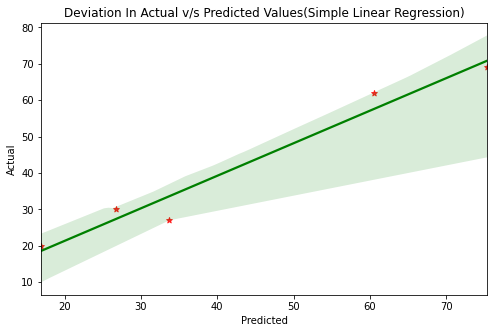

In [227]:
plt.figure(figsize=(8,5))
sns.regplot('Predicted','Actual',data=check,line_kws={'color':'green'},scatter_kws={'color':'red'},marker='*')
plt.title('Deviation In Actual v/s Predicted Values(Simple Linear Regression)')

# **2. Using Lasso Regularization Model**

In [228]:
from sklearn.linear_model import Lasso
model2=Lasso(alpha=1,random_state=0)
model2.fit(X_train,y_train)

Lasso(alpha=1, copy_X=True, fit_intercept=True, max_iter=1000, normalize=False,
      positive=False, precompute=False, random_state=0, selection='cyclic',
      tol=0.0001, warm_start=False)

# **Making Predictions using Model 2:**

In [229]:
predictions2=model2.predict(X_valid)
predictions2

array([17.48947948, 34.06244335, 75.00741292, 27.23828176, 60.3842095 ])

# **Comparing Actual v/s Predicted Values Model 2:**

In [230]:
check=pd.DataFrame({'Actual':y_valid,'Predicted':predictions2})
check.reset_index(drop=True,inplace=True)
check['Deviation']=abs(check['Actual']-check['Predicted'])
check

,Actual,Predicted,Deviation
0,20,17.489479,2.510521
1,27,34.062443,7.062443
2,69,75.007413,6.007413
3,30,27.238282,2.761718
4,62,60.384210,1.615790


# **Evaluating Model 2 Accuracy:**

In [231]:
MAE2=mean_absolute_error(predictions2,y_valid)
RMSE2=np.sqrt(mean_squared_error(y_valid,predictions2))
print('Mean Absolute error in Model 2:',MAE2.round(2))
print('Root Mean Squared Error in Model 2:',RMSE2.round(2))


Mean Absolute error in Model 2: 3.99
Root Mean Squared Error in Model 2: 4.53


# **Visulaizing The Deviation in Actual & Predicted Values for Model 2:**

Text(0.5, 1.0, 'Deviation In Actual v/s Predicted Values(Lasso)')

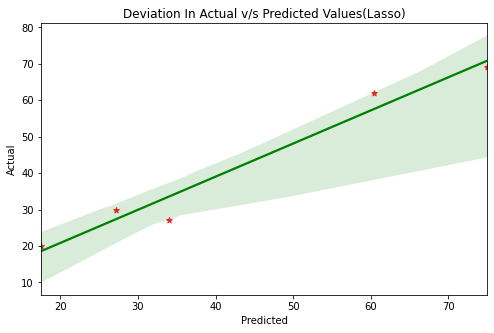

In [232]:
plt.figure(figsize=(8,5))
sns.regplot('Predicted','Actual',data=check,line_kws={'color':'green'},scatter_kws={'color':'red'},marker='*')
plt.title('Deviation In Actual v/s Predicted Values(Lasso)')

# **3. Using Ridge Regularization Model**

In [233]:
from sklearn.linear_model import Ridge

model3=Ridge(alpha=1,random_state=0)
model3.fit(X_train,y_train)

Ridge(alpha=1, copy_X=True, fit_intercept=True, max_iter=None, normalize=False,
      random_state=0, solver='auto', tol=0.001)

# **Making Predictions using Model 3:**

In [234]:
predictions3=model3.predict(X_valid)

# **Comparing Actual v/s Predicted Values In Model 3:**

In [235]:
check=pd.DataFrame({'Actual':y_valid,'Predicted':predictions3})
check['Deviation']=abs(check['Actual']-check['Predicted'])
check

,Actual,Predicted,Deviation
5,20,17.181700,2.818300
2,27,33.894564,6.894564
19,69,75.185168,6.185168
16,30,27.012796,2.987204
11,62,60.438524,1.561476


# **Visualizing The Deviation in Actual & Predicted Values for Model 3:**

Text(0.5, 1.0, 'Deviation In Actual v/s Predicted Values(Ridge)')

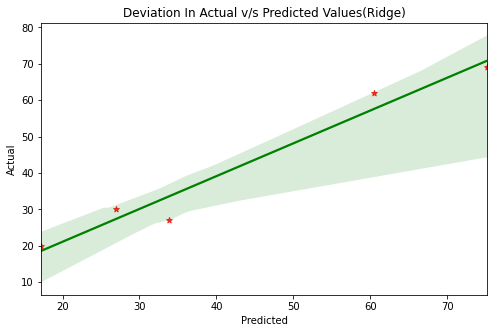

In [236]:
plt.figure(figsize=(8,5))
sns.regplot('Predicted','Actual',data=check,line_kws={'color':'green'},scatter_kws={'color':'red'},marker='*')
plt.title('Deviation In Actual v/s Predicted Values(Ridge)')

# **Evaluating Model 3 Accuracy:**

In [237]:
MAE3=mean_absolute_error(y_valid,predictions3)
RMSE3=np.sqrt(mean_squared_error(y_valid,predictions3))
print('Mean Absolute error in Model 3:',MAE3.round(2))
print('Root Mean Squared Error in Model 3:',RMSE3.round(2))

Mean Absolute error in Model 3: 4.09
Root Mean Squared Error in Model 3: 4.58


# **4. Using ElasticNet Model**

In [238]:
from sklearn.linear_model import ElasticNet
model4=ElasticNet(alpha=1)
model4.fit(X_train,y_train)

ElasticNet(alpha=1, copy_X=True, fit_intercept=True, l1_ratio=0.5,
           max_iter=1000, normalize=False, positive=False, precompute=False,
           random_state=None, selection='cyclic', tol=0.0001, warm_start=False)

# **Making Predictions Using Model 4:**

In [239]:
predictions4=model4.predict(X_valid)
predictions4

array([19.939207  , 35.39865836, 73.59259703, 29.03300192, 59.95190465])

# **Comparing Actual v/s Predicted Values In Model 4:**

In [240]:
check=pd.DataFrame({'Actual':y_valid,'Predicted':predictions4})
check['Deviation']=abs(check['Actual']-check['Predicted'])
check

,Actual,Predicted,Deviation
5,20,19.939207,0.060793
2,27,35.398658,8.398658
19,69,73.592597,4.592597
16,30,29.033002,0.966998
11,62,59.951905,2.048095


# **Visualizing The Deviation in Actual & Predicted Values for Model 4:**

Text(0.5, 1.0, 'Deviation In Actual v/s Predicted Values(ElasticNet)')

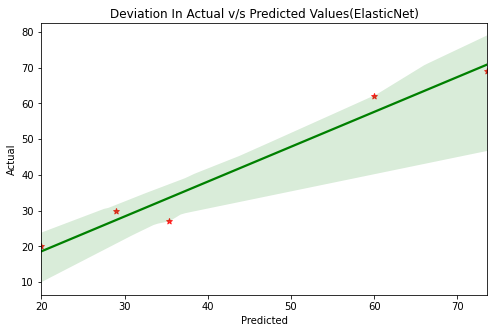

In [241]:
plt.figure(figsize=(8,5))
sns.regplot('Predicted','Actual',data=check,line_kws={'color':'green'},scatter_kws={'color':'red'},marker='*')
plt.title('Deviation In Actual v/s Predicted Values(ElasticNet)')

# **Evaluating Model 4 Accuracy:**

In [242]:
MAE4=mean_absolute_error(y_valid,predictions4)
RMSE4=np.sqrt(mean_squared_error(y_valid,predictions4))
print('Mean Absolute error in Model 4:',MAE4.round(2))
print('Root Mean Squared Error in Model 4:',RMSE4.round(2))

Mean Absolute error in Model 4: 3.21
Root Mean Squared Error in Model 4: 4.4


# **Comparing All The Models' Predicted Values with Actual Values Together:**

In [243]:
final=pd.DataFrame()
errs=[MAE1,MAE2,MAE3]
final['Valid']=y_valid
final['LinearRegression']=predictions1
final['Lasso']=predictions2
final['Ridge']=predictions3
final['ElasticNet']=predictions4

final.head()

,Valid,LinearRegression,Lasso,Ridge,ElasticNet
5,20,16.884145,17.489479,17.181700,19.939207
2,27,33.732261,34.062443,33.894564,35.398658
19,69,75.357018,75.007413,75.185168,73.592597
16,30,26.794801,27.238282,27.012796,29.033002
11,62,60.491033,60.384210,60.438524,59.951905


# **Visualizing The Variation In Predicted v/s Actual Values Model-Wise:(In Order To Decide Final Model!)**

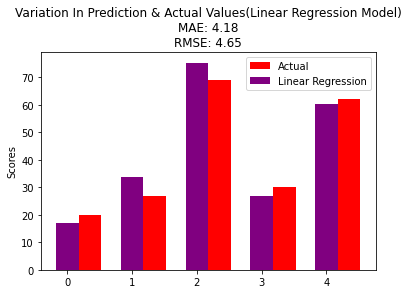

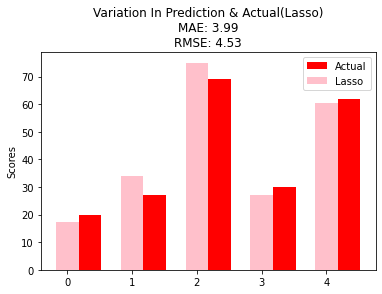

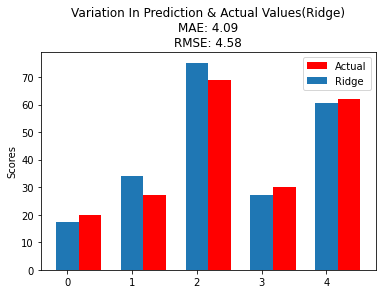

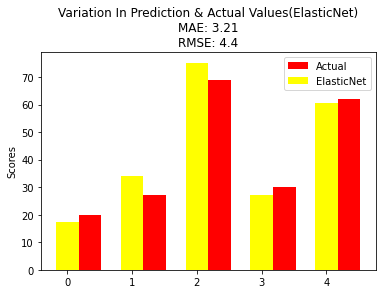

In [244]:
N=np.arange(5)
plt.bar(N+0.35,y_valid,width=0.35,label='Actual',color='red')
plt.bar(N,predictions1,width=0.35,label='Linear Regression',color='purple')
plt.ylabel('Scores')
plt.title('Variation In Prediction & Actual Values(Linear Regression Model)\nMAE: {}\nRMSE: {}'.format(MAE1.round(2),RMSE1.round(2)))
plt.legend(loc='best')
plt.show()

plt.bar(N+0.35,y_valid,width=0.35,label='Actual',color='red')
plt.bar(N,predictions2,width=0.35,label='Lasso',color='pink')
plt.title('Variation In Prediction & Actual(Lasso)\nMAE: {}\nRMSE: {}'.format(MAE2.round(2),RMSE2.round(2)))
plt.ylabel('Scores')
plt.legend(loc='best')
plt.show()


plt.bar(N+0.35,y_valid,width=0.35,label='Actual',color='red')
plt.bar(N,predictions3,width=0.35,label='Ridge')
plt.ylabel('Scores')
plt.title('Variation In Prediction & Actual Values(Ridge)\nMAE: {}\nRMSE: {}'.format(MAE3.round(2),RMSE3.round(2)))
plt.legend(loc='best')
plt.show()

plt.bar(N+0.35,y_valid,width=0.35,label='Actual',color='red')
plt.bar(N,predictions3,width=0.35,label='ElasticNet',color='yellow')
plt.ylabel('Scores')
plt.title('Variation In Prediction & Actual Values(ElasticNet)\nMAE: {}\nRMSE: {}'.format(MAE4.round(2),RMSE4.round(2)))
plt.legend(loc='best')
plt.show()

**Clearly, Model 4 is giving the relatively most accurate output. So, We Finalize Model 4!**

# **Here, You can enter the no. of hours of study to check the estimated corresponding score! Keep Learning :)**

In [245]:
n=float(input())
result=model4.predict([[n]])
print("After studying for {} hours, The Expected Score Should be {}".format(n,result.round(2)))

9.25
After studying for 9.25 hours, The Expected Score Should be [90.42]
